In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
folder_path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 'data', 'target')
target_path = os.path.join(folder_path, 'NAT DATABASE.xlsx')
df = pd.read_excel(target_path, sheet_name='Pairs Analysis')
df.head()

,SeriesID,CatID,UOMID,Data Series,Category,Source,Unit,1980-01-01 00:00:00,1980-02-01 00:00:00,1980-03-01 00:00:00,...,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00
0,1,1.0,1.0,"#1 Bush, CH 5th",Scrap (FastMarkets),FastMarkets,USD / MT,NaN,NaN,NaN,...,398.599554,349.389732,319.863839,319.863839,408.441518,437.967411,437.967411,536.387054,536.387054,526.545089
1,2,1.0,1.0,"#1 Bush, CH 7th",Scrap (FastMarkets),FastMarkets,USD / MT,NaN,NaN,NaN,...,378.915625,349.389732,319.863839,349.389732,408.441518,437.967411,536.387054,536.387054,526.545089,472.414286
2,3,1.0,1.0,"#1 Bush, CH 10th",Scrap (FastMarkets),FastMarkets,USD / MT,NaN,NaN,NaN,...,378.915625,349.389732,319.863839,349.389732,408.441518,437.967411,536.387054,536.387054,526.545089,472.414286
3,4,1.0,1.0,"#1 Bund, CH 5th",Scrap (FastMarkets),FastMarkets,USD / MT,NaN,NaN,NaN,...,403.520536,354.310714,324.784821,324.784821,413.362500,442.888393,442.888393,541.308036,541.308036,531.466071
4,5,1.0,1.0,"#1 Bund, CH 7th",Scrap (FastMarkets),FastMarkets,USD / MT,NaN,NaN,NaN,...,383.836607,354.310714,324.784821,354.310714,413.362500,442.888393,541.308036,541.308036,531.466071,477.335268


In [4]:
df[df['SeriesID'].isin([3, 9, 16])]

,SeriesID,CatID,UOMID,Data Series,Category,Source,Unit,1980-01-01 00:00:00,1980-02-01 00:00:00,1980-03-01 00:00:00,...,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00
2,3,1.0,1.0,"#1 Bush, CH 10th",Scrap (FastMarkets),FastMarkets,USD / MT,NaN,NaN,NaN,...,378.915625,349.389732,319.863839,349.389732,408.441518,437.967411,536.387054,536.387054,526.545089,472.414286
8,9,1.0,1.0,"Shred, CH 10th",Scrap (FastMarkets),FastMarkets,USD / MT,NaN,NaN,NaN,...,418.283482,378.915625,359.231696,378.915625,408.441518,437.967411,501.940179,501.940179,467.493304,408.441518
15,16,1.0,1.0,"#1 HMS, CH 10th",Scrap (FastMarkets),FastMarkets,USD / MT,NaN,NaN,NaN,...,300.179911,290.337946,270.654018,290.337946,329.705804,349.389732,383.836607,364.152679,334.626786,305.100893


In [5]:
df['Category'].unique()

array(['Scrap (FastMarkets)', 'Scrap (Platts, Other)', 'Subs & Raw Mat.',
       'Energy', 'Steel (CRU, Nucor)', 'Steel (Platts, Other)',
       'Futures Settlements', 'Macro Economic',
       'NUE Sheet Avg. Cost (scrap + subs)',
       'NUE Beam Avg. Cost (scrap + subs)',
       'NUE Plate Avg. Cost (scrap + subs)',
       'NUE SBQ Avg. Cost (scrap + subs)',
       'NUE Bar Avg. Cost (scrap + subs)',
       'NUE TOTAL Avg. Cost (scrap + subs)',
       'NUE Sheet Avg. Cost (scrap only)',
       'NUE Beam Avg. Cost (scrap only)',
       'NUE Plate Avg. Cost (scrap only)',
       'NUE SBQ Avg. Cost (scrap only)', 'NUE Bar Avg. Cost (scrap only)',
       'NUE TOTAL Avg. Cost (scrap only)', 'Scrap Production / Trade',
       'Steel Production / Trade'], dtype=object)

In [6]:
# Replace missing values with the previous value
df.fillna(method='ffill', inplace=True, axis=0)
df.head()

,SeriesID,CatID,UOMID,Data Series,Category,Source,Unit,1980-01-01 00:00:00,1980-02-01 00:00:00,1980-03-01 00:00:00,...,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00
0,1,1.0,1.0,"#1 Bush, CH 5th",Scrap (FastMarkets),FastMarkets,USD / MT,NaN,NaN,NaN,...,398.599554,349.389732,319.863839,319.863839,408.441518,437.967411,437.967411,536.387054,536.387054,526.545089
1,2,1.0,1.0,"#1 Bush, CH 7th",Scrap (FastMarkets),FastMarkets,USD / MT,NaN,NaN,NaN,...,378.915625,349.389732,319.863839,349.389732,408.441518,437.967411,536.387054,536.387054,526.545089,472.414286
2,3,1.0,1.0,"#1 Bush, CH 10th",Scrap (FastMarkets),FastMarkets,USD / MT,NaN,NaN,NaN,...,378.915625,349.389732,319.863839,349.389732,408.441518,437.967411,536.387054,536.387054,526.545089,472.414286
3,4,1.0,1.0,"#1 Bund, CH 5th",Scrap (FastMarkets),FastMarkets,USD / MT,NaN,NaN,NaN,...,403.520536,354.310714,324.784821,324.784821,413.362500,442.888393,442.888393,541.308036,541.308036,531.466071
4,5,1.0,1.0,"#1 Bund, CH 7th",Scrap (FastMarkets),FastMarkets,USD / MT,NaN,NaN,NaN,...,383.836607,354.310714,324.784821,354.310714,413.362500,442.888393,541.308036,541.308036,531.466071,477.335268


In [7]:
# Use the melt function to move date columns into rows
df = pd.melt(df, id_vars=['SeriesID', 'CatID', 'UOMID', 'Data Series', 'Category', 'Source', 'Unit'],
             var_name='Date', value_name='Value')

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Reorder columns
df = df[['Date', 'SeriesID', 'CatID', 'UOMID', 'Data Series', 'Category', 'Source', 'Unit', 'Value']]
df.head()

,Date,SeriesID,CatID,UOMID,Data Series,Category,Source,Unit,Value
0,1980-01-01,1,1.0,1.0,"#1 Bush, CH 5th",Scrap (FastMarkets),FastMarkets,USD / MT,NaN
1,1980-01-01,2,1.0,1.0,"#1 Bush, CH 7th",Scrap (FastMarkets),FastMarkets,USD / MT,NaN
2,1980-01-01,3,1.0,1.0,"#1 Bush, CH 10th",Scrap (FastMarkets),FastMarkets,USD / MT,NaN
3,1980-01-01,4,1.0,1.0,"#1 Bund, CH 5th",Scrap (FastMarkets),FastMarkets,USD / MT,NaN
4,1980-01-01,5,1.0,1.0,"#1 Bund, CH 7th",Scrap (FastMarkets),FastMarkets,USD / MT,NaN


In [8]:
# Subset the data to only include data from 2010 onwards
df = df[df['Date'] >= '2010-01-01']

In [9]:
# Replace missing values with 8s
df['CatID'] = df['CatID'].fillna(8.0)
df['CatID'].unique()

array([ 1.,  2.,  3.,  9.,  4.,  5.,  6., 10.,  7.])

In [10]:
cols = ['Date', 'Data Series', 'Category', 'Source', 'Unit', 'Value']
df = df[cols]
df.reset_index(drop=True, inplace=True)
df.head()

,Date,Data Series,Category,Source,Unit,Value
0,2010-01-01,"#1 Bush, CH 5th",Scrap (FastMarkets),FastMarkets,USD / MT,383.836600
1,2010-01-01,"#1 Bush, CH 7th",Scrap (FastMarkets),FastMarkets,USD / MT,383.836607
2,2010-01-01,"#1 Bush, CH 10th",Scrap (FastMarkets),FastMarkets,USD / MT,383.836607
3,2010-01-01,"#1 Bund, CH 5th",Scrap (FastMarkets),FastMarkets,USD / MT,373.994600
4,2010-01-01,"#1 Bund, CH 7th",Scrap (FastMarkets),FastMarkets,USD / MT,373.994643


In [10]:
df.to_csv(os.path.join(folder_path, 'target_clean.csv'), index=False)

In [32]:
from target import Target
target = Target()
df = target.get_data()
# Replace missing values with the previous value
df.fillna(method='ffill', inplace=True, axis=0)

# Use the melt function to move date columns into rows
df = pd.melt(df, id_vars=['SeriesID', 'CatID', 'UOMID', 'Data Series', 'Category', 'Source', 'Unit'],
        var_name='Date', value_name='Value')
 # Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Reorder columns
df = df[['Date', 'SeriesID', 'CatID', 'UOMID', 'Data Series', 'Category', 'Source', 'Unit', 'Value']]

# Subset the data to only include data from 2010 onwards
df = df[df['Date'] >= '2010-01-01']
# Replace missing values with 8s
df['CatID'] = df['CatID'].fillna(8.0)

# Keep only the series we are interested in (3, 9, 16)
df = df[df['SeriesID'].isin([3,9,16])]
df.head()

,Date,SeriesID,CatID,UOMID,Data Series,Category,Source,Unit,Value
88202,2010-01-01,3,1.0,1.0,"#1 Bush, CH 10th",Scrap (FastMarkets),FastMarkets,USD / MT,383.836607
88208,2010-01-01,9,1.0,1.0,"Shred, CH 10th",Scrap (FastMarkets),FastMarkets,USD / MT,344.468750
88215,2010-01-01,16,1.0,1.0,"#1 HMS, CH 10th",Scrap (FastMarkets),FastMarkets,USD / MT,300.179900
88447,2010-02-01,3,1.0,1.0,"#1 Bush, CH 10th",Scrap (FastMarkets),FastMarkets,USD / MT,393.678571
88453,2010-02-01,9,1.0,1.0,"Shred, CH 10th",Scrap (FastMarkets),FastMarkets,USD / MT,339.547768


In [33]:
series = [3, 9, 16]
def change(serie):
    lag = serie.shift(1)
    return (serie - lag) / lag

def indexing(df):
    for serie in series:
        values = change(df[df['SeriesID'] == serie]['Value'])
        df.loc[df['SeriesID'] == serie, 'Value'] = values
    df = df.groupby(['Date'])['Value'].sum().reset_index()
    df['Value'] = round(df['Value']/3, 4)
    return df


In [34]:
df = indexing(df)
# df['Target'] = self.classify(df['Value'])
df.head(50)

,Date,Value
0,2010-01-01,0.0000
1,2010-02-01,0.0038
2,2010-03-01,0.1668
3,2010-04-01,0.0071
4,2010-05-01,-0.0673
5,2010-06-01,-0.0119
6,2010-07-01,-0.1059
7,2010-08-01,0.0677
8,2010-09-01,0.0638
9,2010-10-01,-0.0866


In [29]:
df.head(50)

,Date,SeriesID,CatID,UOMID,Data Series,Category,Source,Unit,Value
88202,2010-01-01,3,1.0,1.0,"#1 Bush, CH 10th",Scrap (FastMarkets),FastMarkets,USD / MT,NaN
88208,2010-01-01,9,1.0,1.0,"Shred, CH 10th",Scrap (FastMarkets),FastMarkets,USD / MT,NaN
88215,2010-01-01,16,1.0,1.0,"#1 HMS, CH 10th",Scrap (FastMarkets),FastMarkets,USD / MT,NaN
88447,2010-02-01,3,1.0,1.0,"#1 Bush, CH 10th",Scrap (FastMarkets),FastMarkets,USD / MT,0.025641
88453,2010-02-01,9,1.0,1.0,"Shred, CH 10th",Scrap (FastMarkets),FastMarkets,USD / MT,-0.014286
88460,2010-02-01,16,1.0,1.0,"#1 HMS, CH 10th",Scrap (FastMarkets),FastMarkets,USD / MT,0.000000
88692,2010-03-01,3,1.0,1.0,"#1 Bush, CH 10th",Scrap (FastMarkets),FastMarkets,USD / MT,0.175000
88698,2010-03-01,9,1.0,1.0,"Shred, CH 10th",Scrap (FastMarkets),FastMarkets,USD / MT,0.144928
88705,2010-03-01,16,1.0,1.0,"#1 HMS, CH 10th",Scrap (FastMarkets),FastMarkets,USD / MT,0.180328
88937,2010-04-01,3,1.0,1.0,"#1 Bush, CH 10th",Scrap (FastMarkets),FastMarkets,USD / MT,0.021277


In [ ]:
df['Target'] = df['Value']
df.drop(['Value'], axis=1, inplace=True)
df.rename(columns={'Date':'date'}, inplace=True)
df = df.resample('M', on='date').last().reset_index()
df['date'] = df['date'].dt.date
df.head()

In [2]:
import pandas as pd
import os
folder_path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 'data', 'target')
target = pd.read_csv(os.path.join(folder_path, 'target_clean.csv'))
target.head()

,Date,Value
0,2010-01-01,0.000000
1,2010-02-01,0.011355
2,2010-03-01,0.500255
3,2010-04-01,0.021277
4,2010-05-01,-0.201960


/var/folders/5j/l7cwj9sd0c1gqp3xyv7290sm0000gn/T/ipykernel_34702/3234564508.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target['Value'], bins=50)


<Axes: xlabel='Value', ylabel='Density'>

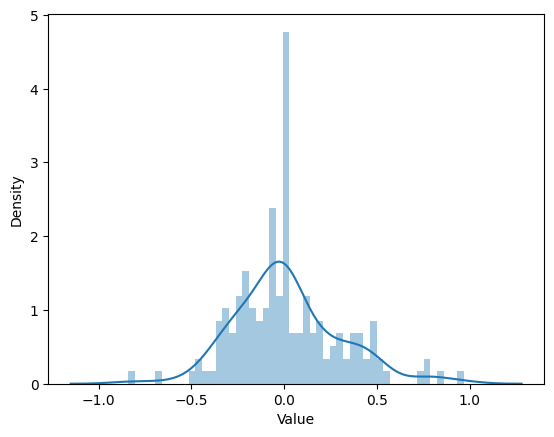

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot distribution of target variable
sns.distplot(target['Value'], bins=50)

In [9]:
import numpy as np
values = target['Value'].values
quantiles = np.quantile(values, [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95])
quantiles

array([-0.36618899, -0.31548245, -0.16767742,  0.        ,  0.15676558,
        0.41669003,  0.49101235])

In [14]:
def classify(serie):
    quartiles = np.quantile(serie, [0.25, 0.75])
    return pd.cut(serie, bins=[-np.inf, quantiles[0], quartiles[1], np.inf], labels=[0, 1, 2])

new_values = classify(target['Value'])
new_values.value_counts()

1    112
2     41
0      9
Name: Value, dtype: int64

<Axes: >

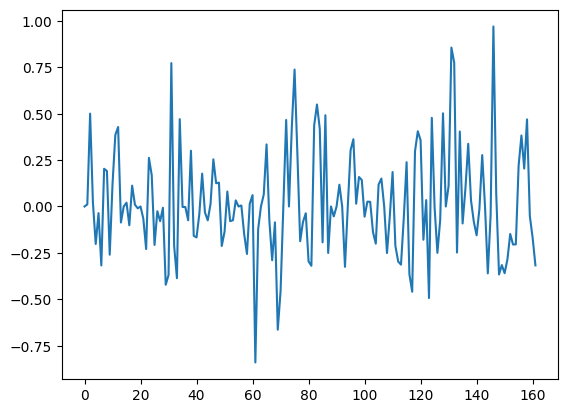

In [15]:
target['Value'].plot()

In [6]:
import numpy as np
target['Lag'] = target['Value'].shift(1)
target.head()

,Date,Value,Lag
0,2010-01-01,0.222876,NaN
1,2010-02-01,0.223747,0.222876
2,2010-03-01,0.261069,0.223747
3,2010-04-01,0.263009,0.261069
4,2010-05-01,0.245614,0.263009


In [7]:
def change(series):
    lag = series.shift(1)
    return (series - lag) / lag

target['Change'] = change(target['Value'])
target.head()

,Date,Value,Lag,Change
0,2010-01-01,0.222876,NaN,NaN
1,2010-02-01,0.223747,0.222876,0.003909
2,2010-03-01,0.261069,0.223747,0.166802
3,2010-04-01,0.263009,0.261069,0.007434
4,2010-05-01,0.245614,0.263009,-0.066140
